In [2]:
# Importing the libraries
import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
import csv
from sklearn.model_selection import GridSearchCV
import tqdm

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:

prop_df = pd.read_csv('/content/drive/MyDrive/properties_2016.csv')

log_error_df = pd.read_csv('/content/drive/MyDrive/train_2016_v2.csv')


<ipython-input-4-d7b165279aac>:1: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  prop_df = pd.read_csv('/content/drive/MyDrive/properties_2016.csv')


In [5]:
train_df = pd.merge(log_error_df, prop_df, on='parcelid', how = 'left')
train_df
means = train_df.mean()
# Replace NaN values with the mean of their respective columns
train_df = train_df.fillna(means)

<ipython-input-5-452c5404bbb4>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  means = train_df.mean()


# Distribution of Home Tax Value


In [6]:
train_df[5:]

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
5,11509835,-0.2705,2016-01-02,1.000000,7.229885,713.581395,4.0,4.0,4.0,1.000000,...,1.440739,1.0,880650.0,2447951.0,2015.0,1567301.0,27126.57,NaN,13.402692,6.037621e+13
6,12286022,0.0440,2016-01-02,1.816372,7.229885,713.581395,1.0,2.0,4.0,7.000000,...,1.440739,1.0,64549.0,111521.0,2015.0,46972.0,2304.97,NaN,13.402692,6.037542e+13
7,17177301,0.1638,2016-01-02,1.816372,7.229885,713.581395,2.5,3.0,4.0,5.565407,...,2.000000,1.0,107000.0,306000.0,2015.0,199000.0,3745.50,NaN,13.402692,6.111003e+13
8,14739064,-0.0030,2016-01-02,1.816372,7.229885,713.581395,1.0,2.0,4.0,5.565407,...,1.440739,1.0,66834.0,210064.0,2015.0,143230.0,2172.88,NaN,13.402692,6.059042e+13
9,14677559,0.0843,2016-01-03,1.816372,7.229885,713.581395,2.0,2.0,4.0,5.565407,...,1.000000,1.0,109977.0,190960.0,2015.0,80983.0,1940.26,NaN,13.402692,6.059063e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90270,10774160,-0.0356,2016-12-30,1.000000,7.229885,713.581395,1.0,1.0,4.0,4.000000,...,1.440739,1.0,43800.0,191000.0,2015.0,147200.0,2495.24,NaN,13.402692,6.037132e+13
90271,12046695,0.0070,2016-12-30,1.816372,7.229885,713.581395,3.0,3.0,4.0,4.000000,...,1.440739,1.0,117893.0,161111.0,2015.0,43218.0,1886.54,NaN,13.402692,6.037301e+13
90272,12995401,-0.2679,2016-12-30,1.816372,7.229885,713.581395,2.0,4.0,4.0,7.000000,...,1.440739,1.0,22008.0,38096.0,2015.0,16088.0,1925.70,Y,14.000000,6.037433e+13
90273,11402105,0.0602,2016-12-30,1.816372,7.229885,713.581395,2.0,2.0,4.0,4.000000,...,1.440739,1.0,132991.0,165869.0,2015.0,32878.0,2285.57,NaN,13.402692,6.037601e+13


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


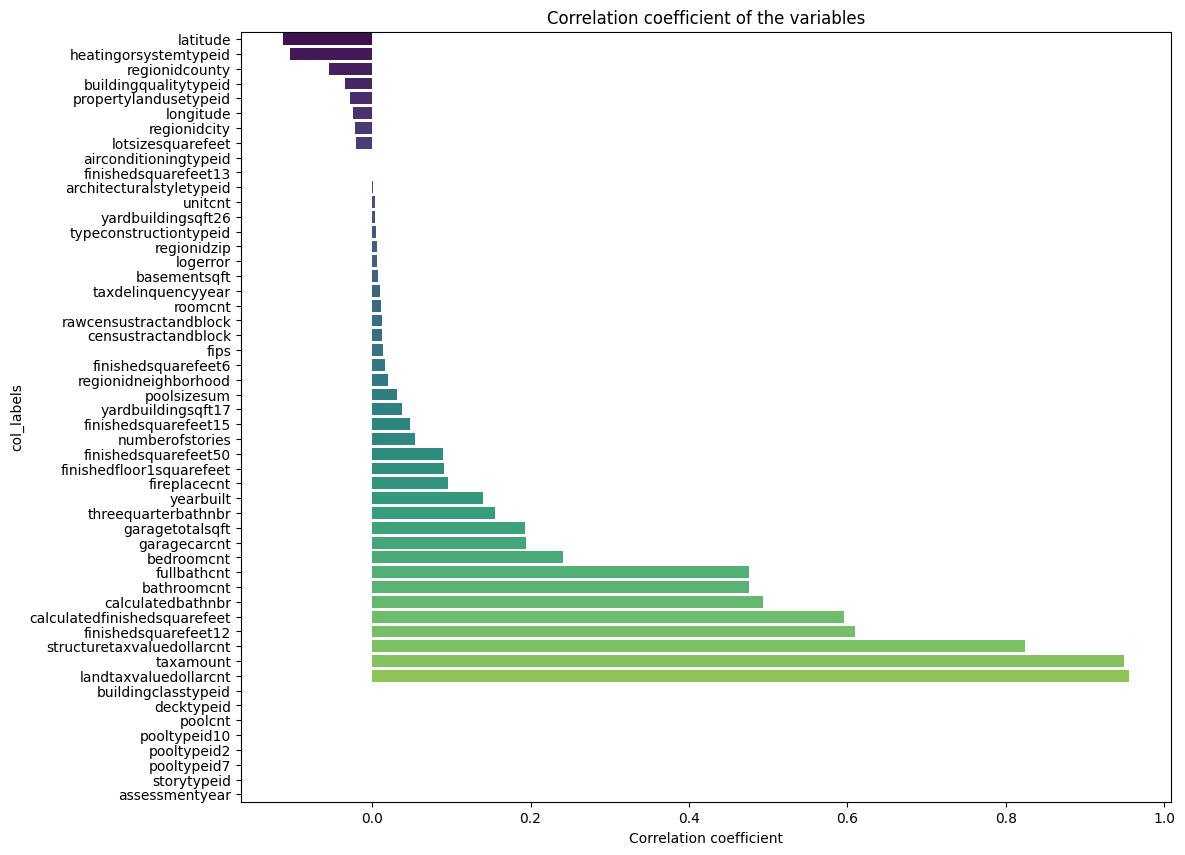

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Calculate mean values and fill missing values


# Select columns of type 'float64'
x_cols = [col for col in train_df.columns if col != 'taxvaluedollarcnt' and train_df[col].dtype == 'float64']

labels = []
values = []

for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(train_df[col].values, train_df['taxvaluedollarcnt'].values)[0, 1])

corr_df = pd.DataFrame({'col_labels': labels, 'corr_values': values})
corr_df = corr_df.sort_values(by='corr_values')

# Create a horizontal bar plot with Seaborn
plt.figure(figsize=(12, 10))
sns.barplot(x='corr_values', y='col_labels', data=corr_df, palette='viridis')

plt.xlabel("Correlation coefficient")
plt.title("Correlation coefficient of the variables")

plt.show()


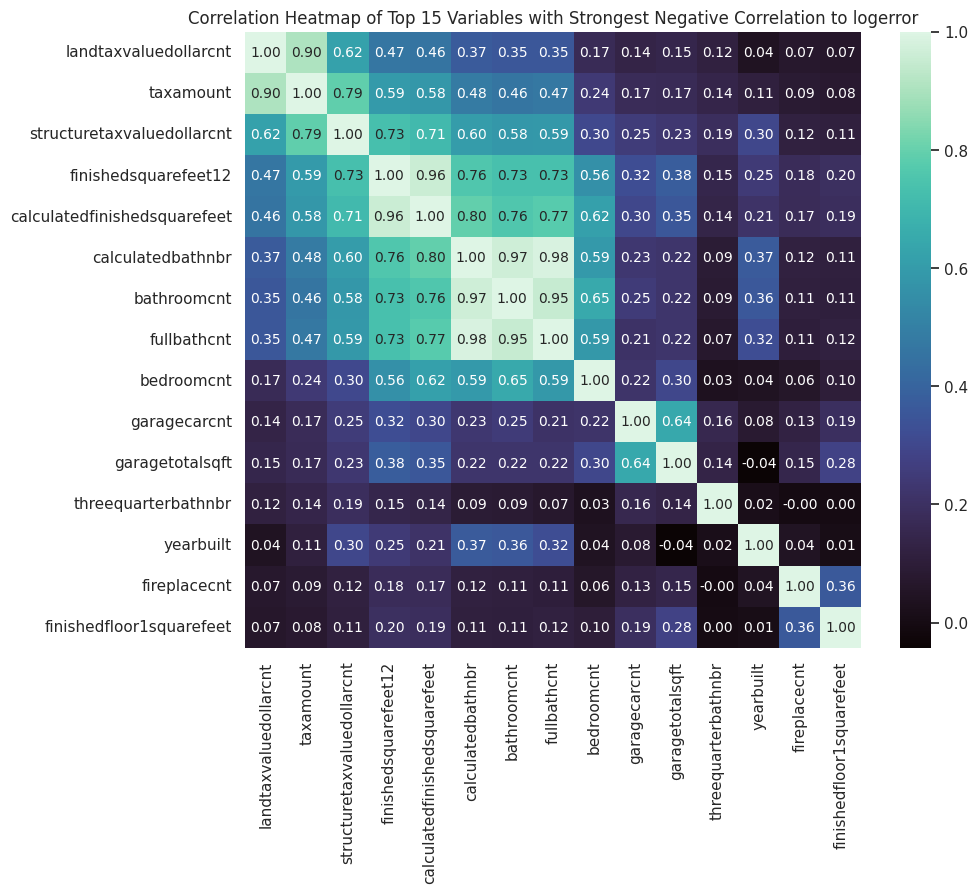

In [9]:
k = 15 # Number of variables for the heatmap
cols = corr_df.nlargest(k, 'corr_values')['col_labels']
cm = np.corrcoef(train_df[cols].values.T)

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.0)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, cmap='mako')
plt.title(f'Correlation Heatmap of Top {k} Variables with Strongest Negative Correlation to logerror')
plt.show()


<ipython-input-10-f26a59821c3e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr()[['taxvaluedollarcnt']].sort_values(by='taxvaluedollarcnt', ascending=False).drop('taxvaluedollarcnt').head(15), annot=True, cmap='viridis')


<Axes: >

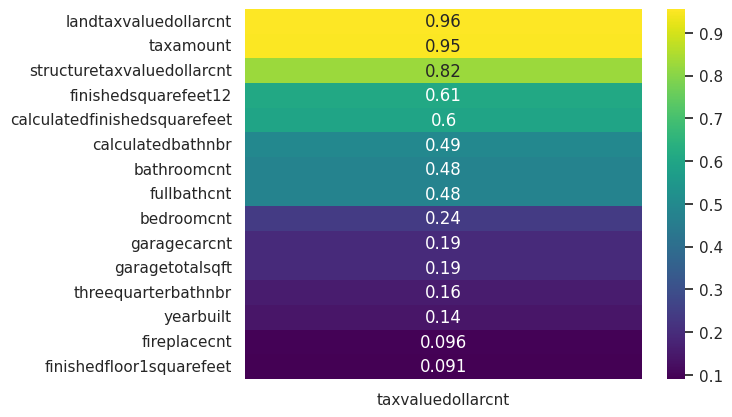

In [10]:
sns.heatmap(train_df.corr()[['taxvaluedollarcnt']].sort_values(by='taxvaluedollarcnt', ascending=False).drop('taxvaluedollarcnt').head(15), annot=True, cmap='viridis')


In [11]:
key_features = list(train_df[cols].columns)
print(f'The Key Featyres we will focus on are {key_features}')
key_features.remove('landtaxvaluedollarcnt')

The Key Featyres we will focus on are ['landtaxvaluedollarcnt', 'taxamount', 'structuretaxvaluedollarcnt', 'finishedsquarefeet12', 'calculatedfinishedsquarefeet', 'calculatedbathnbr', 'bathroomcnt', 'fullbathcnt', 'bedroomcnt', 'garagecarcnt', 'garagetotalsqft', 'threequarterbathnbr', 'yearbuilt', 'fireplacecnt', 'finishedfloor1squarefeet']


# Train Test Split


In [12]:
from sklearn.model_selection import train_test_split

# Define the features to use for modeling

# Extract the selected features and the target variable 'taxvaluedollarcnt'
X = train_df[key_features]
y = train_df['taxvaluedollarcnt']

# Set random seeds for reproducibility
random_seed = 42

# Split the data into training, validation, and test sets (e.g., 60% training, 20% validation, 20% testing)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=random_seed)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=random_seed)

# Scale the Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


# LINEAR REGRESSION

In [13]:
print('------------Linear Regression-----------------')
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets
lm.fit(X_train, y_train)

# Model prediction on the training set
y_train_pred = lm.predict(X_train)
print("========================================================================")
# Model Evaluation on the training set
print('------------Train Set-----------------')
print('R^2:', metrics.r2_score(y_train, y_train_pred))
print('Adjusted R^2:', 1 - (1 - metrics.r2_score(y_train, y_train_pred)) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1))
print('MAE:', metrics.mean_absolute_error(y_train, y_train_pred))
print('MSE:', metrics.mean_squared_error(y_train, y_train_pred))
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
rmse_train =  (rmse_train/np.mean(y_train))
print('RMSE: {:.2f}'.format(rmse_train))
print("========================================================================")

print("========================================================================")
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

# Model Evaluation on the test set
print('------------Test Set-----------------')
acc_linreg = metrics.r2_score(y_test, y_test_pred)
mae_linreg = metrics.mean_absolute_error(y_test, y_test_pred)
rmse_linreg = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
rmse_linreg2 =  (rmse_linreg / (sum(y_test_pred) / len(y_test_pred)))
print('R^2:', acc_linreg)
print('Adjusted R^2:', 1 - (1 - metrics.r2_score(y_test, y_test_pred)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))
print('MAE:', mae_linreg)
print('MSE:', metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE (Linear Regression): {:.2f}'.format(rmse_linreg2))
# Model prediction on the validation set
y_val_pred = lm.predict(X_val)

# Model Evaluation on the validation set
print("========================================================================")
print("========================================================================")
print('------------Validation Set-----------------')
print('R^2:', metrics.r2_score(y_val, y_val_pred))
print('Adjusted R^2:', 1 - (1 - metrics.r2_score(y_val, y_val_pred)) * (len(y_val) - 1) / (len(y_val) - X_val.shape[1] - 1))
print('MAE:', metrics.mean_absolute_error(y_val, y_val_pred))
print('MSE:', metrics.mean_squared_error(y_val, y_val_pred))
rmse_val = np.sqrt(metrics.mean_squared_error(y_val, y_val_pred))
rmse_val = (rmse_val / (sum(y_val_pred) / len(y_val_pred)))
print('RMSE: {:.2f}'.format(rmse_val))
print("========================================================================")

------------Linear Regression-----------------
------------Train Set-----------------
R^2: 0.9311654618244086
Adjusted R^2: 0.9311476652679089
MAE: 68655.07659234568
MSE: 22058684357.643696
RMSE: 0.32
------------Test Set-----------------
R^2: 0.9030377367493592
Adjusted R^2: 0.9029624888732223
MAE: 69187.80969570515
MSE: 29974149501.395966
RMSE (Linear Regression): 0.38
------------Validation Set-----------------
R^2: 0.8762676754337778
Adjusted R^2: 0.8761716525654892
MAE: 68986.64107441582
MSE: 33273594138.693283
RMSE: 0.40


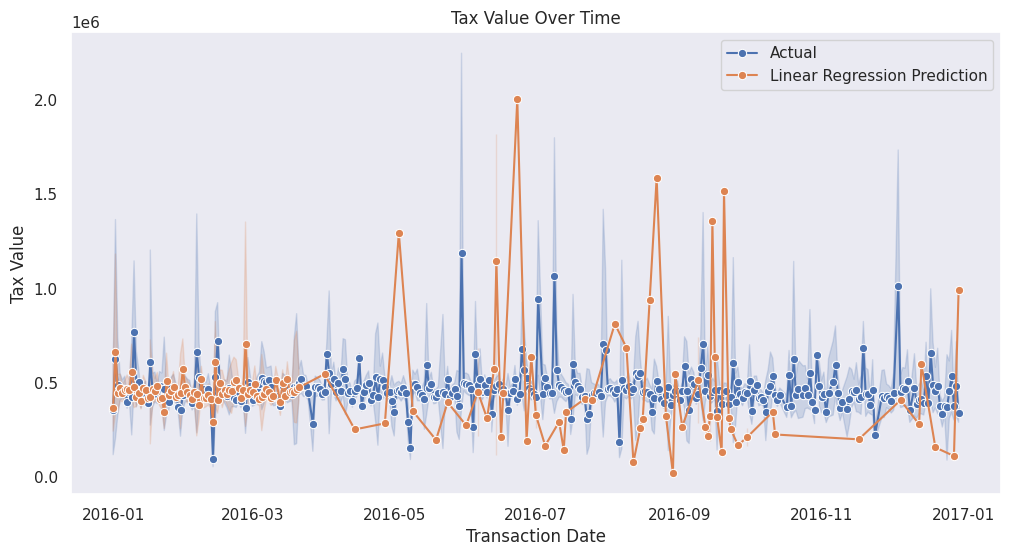

In [14]:
lm_ts = pd.DataFrame()
lm_ts['pred_lm'] = y_val_pred
lm_ts= train_df[['transactiondate','taxvaluedollarcnt']].merge(lm_ts[['pred_lm']], how = 'left', left_index = True, right_index = True)


lm_ts['transactiondate'] = pd.to_datetime(lm_ts['transactiondate'])


lm_ts = lm_ts.sort_values(by='transactiondate')
# Create a time series plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='transactiondate', y='taxvaluedollarcnt', data=lm_ts, label='Actual', marker='o')
# sns.lineplot(x='transactiondate', y='taxvaluedollarcnt', data=lm_ts2, label='Dropped NA Actual ', marker='o')
sns.lineplot(x='transactiondate', y='pred_lm', data=lm_ts, label='Linear Regression Prediction', marker='o')
# Add more lines for other models if needed

plt.title('Tax Value Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Tax Value')
plt.legend()
plt.grid()
plt.show()


In [15]:
print('------------Lasso Regression-----------------')
# Import library for Lasso Regression
from sklearn.linear_model import Lasso

# Create a Lasso regressor
lasso = Lasso()

# Train the model using the training sets
lasso.fit(X_train, y_train)

# Model prediction on the training set
y_train_pred = lasso.predict(X_train)
print("========================================================================")
# Model Evaluation on the training set
print('------------Train Set-----------------')
print('R^2:', metrics.r2_score(y_train, y_train_pred))
print('Adjusted R^2:', 1 - (1 - metrics.r2_score(y_train, y_train_pred)) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1))
print('MAE:', metrics.mean_absolute_error(y_train, y_train_pred))
print('MSE:', metrics.mean_squared_error(y_train, y_train_pred))
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
rmse_train =  (rmse_train/np.mean(y_train))
print('RMSE: {:.2f}'.format(rmse_train))
print("========================================================================")

print("========================================================================")
# Predicting Test data with the model
y_test_pred = lasso.predict(X_test)

# Model Evaluation on the test set
print('------------Test Set-----------------')
acc_lasso = metrics.r2_score(y_test, y_test_pred)
mae_lasso = metrics.mean_absolute_error(y_test, y_test_pred)
rmse_lasso = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
rmse_lasso2 =  (rmse_lasso / (sum(y_test_pred) / len(y_test_pred)))
print('R^2:', acc_lasso)
print('Adjusted R^2:', 1 - (1 - metrics.r2_score(y_test, y_test_pred)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))
print('MAE:', mae_lasso)
print('MSE:', metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE (Lasso Regression): {:.2f}'.format(rmse_lasso2))
# Model prediction on the validation set
y_val_pred_lasso = lasso.predict(X_val)

# Model Evaluation on the validation set
print("========================================================================")
print("========================================================================")
print('------------Validation Set-----------------')
print('R^2:', metrics.r2_score(y_val, y_val_pred_lasso))
print('Adjusted R^2:', 1 - (1 - metrics.r2_score(y_val, y_val_pred_lasso)) * (len(y_val) - 1) / (len(y_val) - X_val.shape[1] - 1))
print('MAE:', metrics.mean_absolute_error(y_val, y_val_pred_lasso))
print('MSE:', metrics.mean_squared_error(y_val, y_val_pred_lasso))
rmse_val = np.sqrt(metrics.mean_squared_error(y_val, y_val_pred_lasso))
rmse_val = (rmse_val / (sum(y_val_pred_lasso) / len(y_val_pred_lasso)))
print('RMSE: {:.2f}'.format(rmse_val))
print("========================================================================")



------------Lasso Regression-----------------
------------Train Set-----------------
R^2: 0.9311654610321769
Adjusted R^2: 0.9311476644754724
MAE: 68654.42268615149
MSE: 22058684611.521915
RMSE: 0.32
------------Test Set-----------------
R^2: 0.9030380145508763
Adjusted R^2: 0.9029627668903282
MAE: 69186.9451321959
MSE: 29974063624.025455
RMSE (Lasso Regression): 0.38
------------Validation Set-----------------
R^2: 0.8762679114500016
Adjusted R^2: 0.8761718887648741
MAE: 68985.89427313818
MSE: 33273530670.16906
RMSE: 0.40


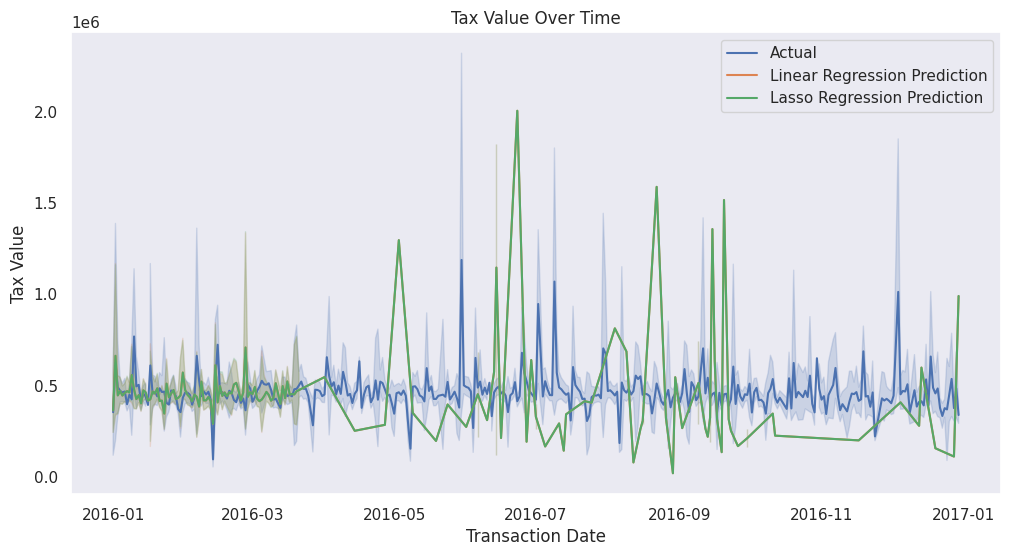

In [42]:
lasso_ts = pd.DataFrame()
lasso_ts['pred_lasso'] = y_val_pred_lasso
lasso_ts = lm_ts.merge(lasso_ts[['pred_lasso']], how = 'left', left_index = True, right_index = True)


# xg_ts = pd.DataFrame()
# xg_ts['pred_xgr'] = y_test_pred_xgr
# xg_ts= lm_ts.merge(xg_ts[['pred_xgr']], how = 'left', left_index = True, right_index = True)
# # print(lm_ts[['transactiondate','taxvaluedollarcnt','pred_lm']])



# Merge data for Lasso, Ridge, Linear Regression, and XGBoost
merged_data = lm_ts[['transactiondate', 'taxvaluedollarcnt', 'pred_lm']]
merged_data = merged_data.merge(lasso_ts[['pred_lasso']], how='left', left_index=True, right_index=True)

# Assuming you have merged the data into a DataFrame named 'merged_data'
# If not, merge the data based on the 'transactiondate' column

# Convert 'transactiondate' to datetime format
merged_data['transactiondate'] = pd.to_datetime(merged_data['transactiondate'])

# Sort the data by date
merged_data = merged_data.sort_values(by='transactiondate')

# Create a time series plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='transactiondate', y='taxvaluedollarcnt', data=merged_data, label='Actual')
sns.lineplot(x='transactiondate', y='pred_lm', data=merged_data, label='Linear Regression Prediction')
# sns.lineplot(x='transactiondate', y='pred_xgr', data=merged_data, label='XGBoost Regressor Prediction')
# Add more lines for other models if needed
sns.lineplot(x='transactiondate', y='pred_lasso', data=merged_data, label='Lasso Regression Prediction')
# sns.lineplot(x='transactiondate', y='pred_ridge', data=merged_data, label='Ridge Regression Prediction')

plt.title('Tax Value Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Tax Value')
plt.legend()
plt.grid()
plt.show()


In [19]:
# import matplotlib.pyplot as plt
# from sklearn.neighbors import KNeighborsRegressor
# # Define a range of K values to test
# k_values = range(1, 21)  # You can adjust the range as needed

# # Lists to store performance metrics for different K values
# rmse_values = []
# r2_values = []

# for k in k_values:
#     # Create a KNN regressor with the current K value
#     knn = KNeighborsRegressor(n_neighbors=k)

#     # Train the model using the training sets
#     knn.fit(X_train, y_train)

#     # Predicting Test data with the model
#     y_test_pred = knn.predict(X_test)

#     # Calculate RMSE and R^2 for the current K value
#     rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
#     r2 = metrics.r2_score(y_test, y_test_pred)

#     # Append the metrics to the lists
#     rmse_values.append(rmse)
#     r2_values.append(r2)

# # Plot RMSE values for different K values
# plt.figure(figsize=(10, 5))
# plt.plot(k_values, rmse_values, marker='o', linestyle='-')
# plt.title('RMSE vs. K Value for KNN Regression')
# plt.xlabel('K Value')
# plt.ylabel('RMSE')
# plt.grid(True)
# plt.show()

# # Plot R^2 values for different K values
# plt.figure(figsize=(10, 5))
# plt.plot(k_values, r2_values, marker='o', linestyle='-')
# plt.title('R^2 vs. K Value for KNN Regression')
# plt.xlabel('K Value')
# plt.ylabel('R^2')
# plt.grid(True)
# plt.show()


In [43]:
print('------------K-Nearest Neighbors (KNN) Regression-----------------')
# Import library for KNN Regression
from sklearn.neighbors import KNeighborsRegressor

# Create a KNN regressor with a specified number of neighbors (adjust n_neighbors as needed)
knn = KNeighborsRegressor(n_neighbors=8)  # You can adjust the number of neighbors as needed

# Train the model using the training sets
knn.fit(X_train, y_train)

# Model prediction on the training set
y_train_pred = knn.predict(X_train)
print("========================================================================")
# Model Evaluation on the training set
print('------------Train Set-----------------')
print('R^2:', metrics.r2_score(y_train, y_train_pred))
print('MAE:', metrics.mean_absolute_error(y_train, y_train_pred))
print('MSE:', metrics.mean_squared_error(y_train, y_train_pred))
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
rmse_train =  (rmse_train/np.mean(y_train))
print('RMSE: {:.2f}'.format(rmse_train))
print("========================================================================")

print("========================================================================")
# Predicting Test data with the model
y_test_pred = knn.predict(X_test)

# Model Evaluation on the test set
print('------------Test Set-----------------')
acc_knn = metrics.r2_score(y_test, y_test_pred)
mae_knn = metrics.mean_absolute_error(y_test, y_test_pred)
rmse_knn = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
rmse_knn2 =  (rmse_knn / (sum(y_test_pred) / len(y_test_pred)))
print('R^2:', acc_knn)
print('MAE:', mae_knn)
print('MSE:', metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE (KNN Regression): {:.2f}'.format(rmse_knn2))
# Model prediction on the validation set
y_val_pred_knn = knn.predict(X_val)

# Model Evaluation on the validation set
print("========================================================================")
print("========================================================================")
print('------------Validation Set-----------------')
print('R^2:', metrics.r2_score(y_val, y_val_pred_knn))
print('MAE:', metrics.mean_absolute_error(y_val, y_val_pred_knn))
print('MSE:', metrics.mean_squared_error(y_val, y_val_pred_knn))
rmse_val = np.sqrt(metrics.mean_squared_error(y_val, y_val_pred_knn))
rmse_val = (rmse_val / (sum(y_val_pred_knn) / len(y_val_pred_knn)))
print('RMSE: {:.2f}'.format(rmse_val))
print("========================================================================")


------------K-Nearest Neighbors (KNN) Regression-----------------
------------Train Set-----------------
R^2: 0.9149512945016963
MAE: 66178.03772500693
MSE: 27254668939.996265
RMSE: 0.36
------------Test Set-----------------
R^2: 0.8789562240800634
MAE: 76349.39818609803
MSE: 37418518442.15975
RMSE (KNN Regression): 0.43
------------Validation Set-----------------
R^2: 0.8882422142446608
MAE: 74554.86614524269
MSE: 30053449800.597504
RMSE: 0.39


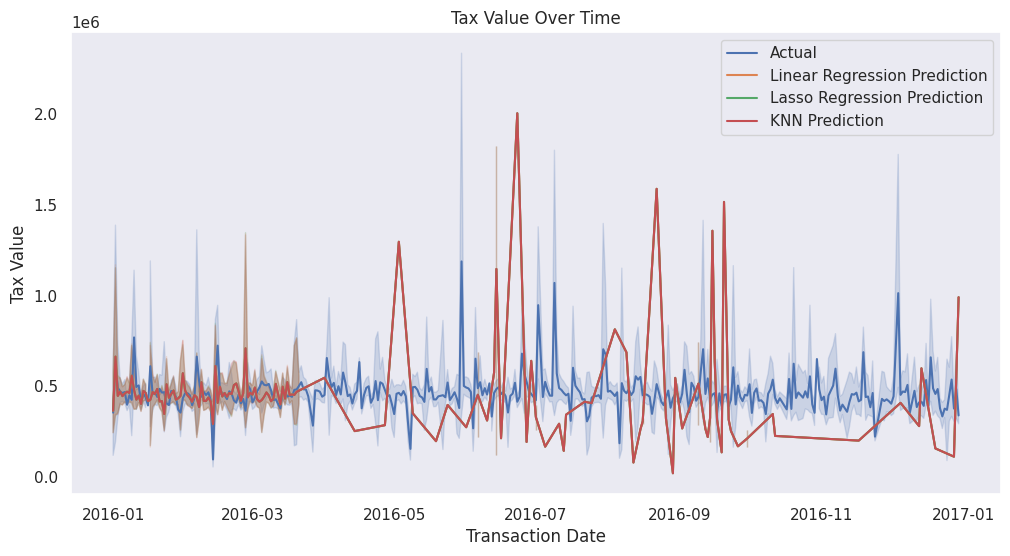

In [48]:
knn_ts = pd.DataFrame()
knn_ts['pred_knn'] = y_val_pred_lasso
knn_ts = lasso_ts.merge(knn_ts[['pred_knn']], how = 'left', left_index = True, right_index = True)


# xg_ts = pd.DataFrame()
# xg_ts['pred_xgr'] = y_test_pred_xgr
# xg_ts= lm_ts.merge(xg_ts[['pred_xgr']], how = 'left', left_index = True, right_index = True)
# # print(lm_ts[['transactiondate','taxvaluedollarcnt','pred_lm']])



# Merge data for Lasso, Ridge, Linear Regression, and XGBoost
merged_data = knn_ts
# merged_data = merged_data.merge(knn_ts[['pred_knn']], how='left', left_index=True, right_index=True)

# Assuming you have merged the data into a DataFrame named 'merged_data'
# If not, merge the data based on the 'transactiondate' column

# Convert 'transactiondate' to datetime format
merged_data['transactiondate'] = pd.to_datetime(merged_data['transactiondate'])

# Sort the data by date
merged_data = merged_data.sort_values(by='transactiondate')

# Create a time series plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='transactiondate', y='taxvaluedollarcnt', data=merged_data, label='Actual')
sns.lineplot(x='transactiondate', y='pred_lm', data=merged_data, label='Linear Regression Prediction')
# sns.lineplot(x='transactiondate', y='pred_xgr', data=merged_data, label='XGBoost Regressor Prediction')
# Add more lines for other models if needed
sns.lineplot(x='transactiondate', y='pred_lasso', data=merged_data, label='Lasso Regression Prediction')
sns.lineplot(x='transactiondate', y='pred_knn', data=merged_data, label='KNN Prediction')
# sns.lineplot(x='transactiondate', y='pred_ridge', data=merged_data, label='Ridge Regression Prediction')
plt.title('Tax Value Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Tax Value')
plt.legend()
plt.grid()
plt.show()


In [49]:
print(knn_ts)

      transactiondate  taxvaluedollarcnt        pred_lm     pred_lasso  \
0          2016-01-01           360170.0  572141.710603  572138.715231   
1          2016-01-01           585529.0  244728.641566  244730.590152   
2          2016-01-01           119906.0  279964.000394  279966.703176   
3          2016-01-02           244880.0  339951.701511  339959.984605   
4          2016-01-02           434551.0  674642.208545  674656.810351   
...               ...                ...            ...            ...   
90207      2016-12-30           550740.0            NaN            NaN   
90206      2016-12-30           149822.0            NaN            NaN   
90205      2016-12-30            30962.0            NaN            NaN   
90214      2016-12-30           451091.0            NaN            NaN   
90274      2016-12-30           163037.0            NaN            NaN   

            pred_knn  
0      572138.715231  
1      244730.590152  
2      279966.703176  
3      339959.98460

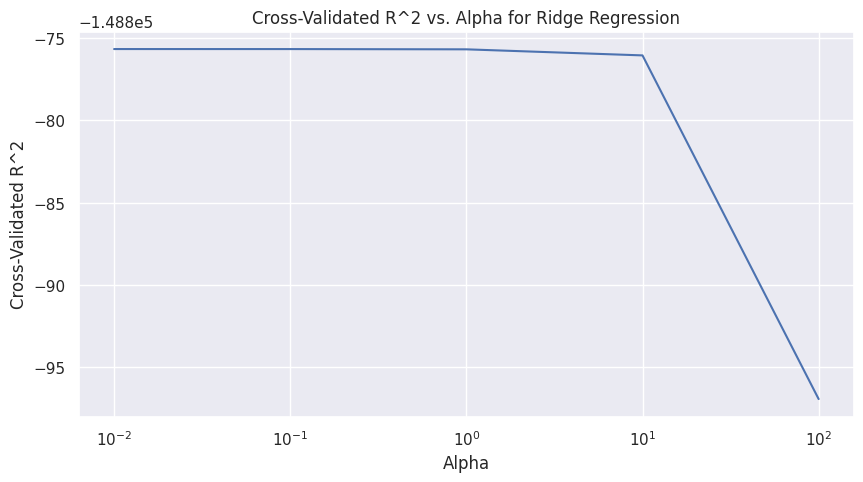

Optimal Alpha: 0.01


In [24]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Define a range of alpha values to test
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]  # You can adjust the range of alphas as needed

# Lists to store alpha values and their corresponding cross-validated R^2 scores
alpha_values = []
mean_cv_r2 = []

for alpha in alphas:
    # Create a Ridge regressor with the current alpha
    ridge = Ridge(alpha=alpha)

    # Get cross-validated R^2 scores
    cv_r2 = cross_val_score(ridge, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5)  # You can adjust the number of cross-validation folds

    alpha_values.append(alpha)
    mean_cv_r2.append(np.mean(cv_r2))

# Plot the cross-validated R^2 values for different alpha values
plt.figure(figsize=(10, 5))
plt.plot(alpha_values, mean_cv_r2)
plt.title('Cross-Validated R^2 vs. Alpha for Ridge Regression')
plt.xlabel('Alpha')
plt.ylabel('Cross-Validated R^2')
plt.xscale('log')
plt.grid(True)
plt.show()

# Find the optimal alpha with the highest cross-validated R^2
optimal_alpha = alpha_values[np.argmax(mean_cv_r2)]
print('Optimal Alpha:', optimal_alpha)


In [53]:
print('------------Ridge Regression-----------------')
# Import library for Ridge Regression
from sklearn.linear_model import Ridge

# Create a Ridge regressor with a specified alpha value (adjust alpha as needed)
ridge = Ridge(alpha=0.1)  # You can adjust the alpha value as needed for regularization

# Train the model using the training sets
ridge.fit(X_train, y_train)

# Model prediction on the training set
y_train_pred = ridge.predict(X_train)
print("========================================================================")
# Model Evaluation on the training set
print('------------Train Set-----------------')
print('R^2:', metrics.r2_score(y_train, y_train_pred))
print('Adjusted R^2:', 1 - (1 - metrics.r2_score(y_train, y_train_pred)) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1))
print('MAE:', metrics.mean_absolute_error(y_train, y_train_pred))
print('MSE:', metrics.mean_squared_error(y_train, y_train_pred))
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
rmse_train =  (rmse_train/np.mean(y_train))
print('RMSE: {:.2f}'.format(rmse_train))
print("========================================================================")

print("========================================================================")
# Predicting Test data with the model
y_test_pred_ridge = ridge.predict(X_test)

# Model Evaluation on the test set
print('------------Test Set-----------------')
acc_ridge = metrics.r2_score(y_test, y_test_pred_ridge)
mae_ridge = metrics.mean_absolute_error(y_test, y_test_pred_ridge)
rmse_ridge = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_ridge))
rmse_ridge2 =  (rmse_ridge / (sum(y_test_pred_ridge) / len(y_test_pred_ridge)))
print('R^2:', acc_ridge)
print('Adjusted R^2:', 1 - (1 - metrics.r2_score(y_test, y_test_pred_ridge)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))
print('MAE:', mae_ridge)
print('MSE:', metrics.mean_squared_error(y_test, y_test_pred_ridge))
print('RMSE (Ridge Regression): {:.2f}'.format(rmse_ridge2))
# Model prediction on the validation set
y_val_pred_ridge = ridge.predict(X_val)

# Model Evaluation on the validation set
print("========================================================================")
print("========================================================================")
print('------------Validation Set-----------------')
print('R^2:', metrics.r2_score(y_val, y_val_pred_ridge))
print('Adjusted R^2:', 1 - (1 - metrics.r2_score(y_val, y_val_pred_ridge)) * (len(y_val) - 1) / (len(y_val) - X_val.shape[1] - 1))
print('MAE:', metrics.mean_absolute_error(y_val, y_val_pred_ridge))
print('MSE:', metrics.mean_squared_error(y_val, y_val_pred_ridge))
rmse_val = np.sqrt(metrics.mean_squared_error(y_val, y_val_pred_ridge))
rmse_val = (rmse_val / (sum(y_val_pred_ridge) / len(y_val_pred_ridge)))
print('RMSE: {:.2f}'.format(rmse_val))
print("========================================================================")


------------Ridge Regression-----------------
------------Train Set-----------------
R^2: 0.9311654618101239
Adjusted R^2: 0.9311476652536206
MAE: 68655.12715594229
MSE: 22058684362.22137
RMSE: 0.32
------------Test Set-----------------
R^2: 0.9030379135661245
Adjusted R^2: 0.9029626658272069
MAE: 69187.84717241954
MSE: 29974094841.65534
RMSE (Ridge Regression): 0.38
------------Validation Set-----------------
R^2: 0.8762682261419432
Adjusted R^2: 0.8761722037010334
MAE: 68986.67213943877
MSE: 33273446044.49035
RMSE: 0.40


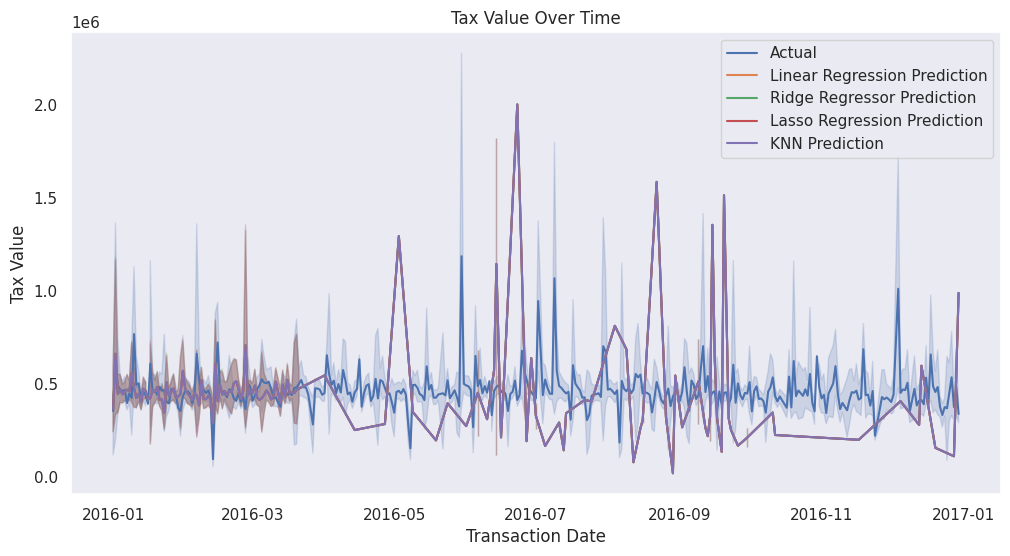

In [55]:
ridge_ts = pd.DataFrame()
ridge_ts['pred_ridge'] = y_val_pred_ridge
ridge_ts= knn_ts.merge(ridge_ts[['pred_ridge']], how = 'left', left_index = True, right_index = True)

# Assuming you have merged the data into a DataFrame named 'merged_data'
# If not, merge the data based on the 'transactiondate' column

# Convert 'transactiondate' to datetime format
merged_data = ridge_ts
# Sort the data by date
merged_data = merged_data.sort_values(by='transactiondate')

# Create a time series plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='transactiondate', y='taxvaluedollarcnt', data=merged_data, label='Actual')
sns.lineplot(x='transactiondate', y='pred_lm', data=merged_data, label='Linear Regression Prediction')
sns.lineplot(x='transactiondate', y='pred_ridge', data=merged_data, label='Ridge Regressor Prediction')
sns.lineplot(x='transactiondate', y='pred_lasso', data=merged_data, label='Lasso Regression Prediction')
sns.lineplot(x='transactiondate', y='pred_knn', data=merged_data, label='KNN Prediction')


plt.title('Tax Value Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Tax Value')
plt.legend()
plt.grid()
plt.show()


<ipython-input-26-bc4e2bf4ea0b>:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test, y_test_pred, alpha=0.7, cmap=palette, edgecolors='k', s=50)  # Added edgecolors and marker size


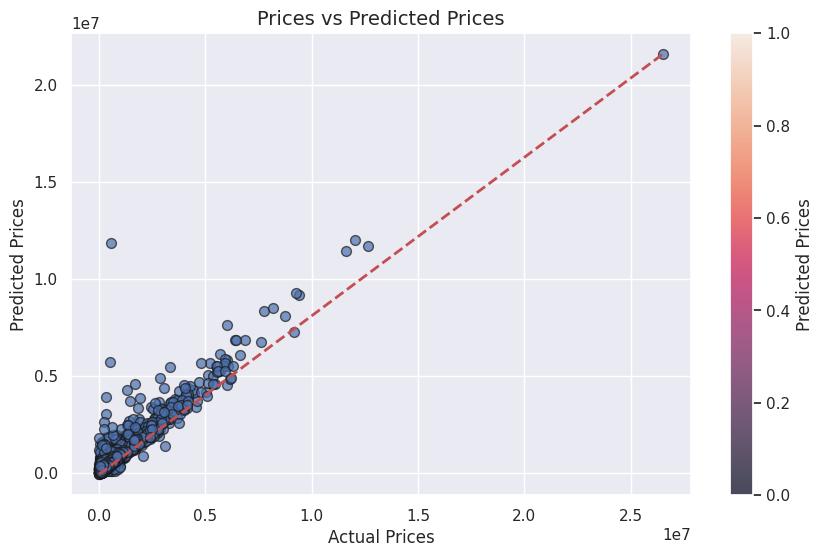

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
palette = sns.color_palette('mako', as_cmap=True)

# Visualizing the differences between actual prices and predicted values
plt.figure(figsize=(10, 6))  # Adjusted figure size to match the original
plt.scatter(y_test, y_test_pred, alpha=0.7, cmap=palette, edgecolors='k', s=50)  # Added edgecolors and marker size
plt.xlabel("Actual Prices", fontsize=12)
plt.ylabel("Predicted Prices", fontsize=12)
plt.title("Prices vs Predicted Prices", fontsize=14)
plt.colorbar(label="Predicted Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test_pred), max(y_test_pred)], linestyle='--', color='r', linewidth=2)
plt.grid(True)
plt.show()


# XG BOOST

In [31]:
print('------------XGBoost Regressor-----------------')
# Import XGBoost Regressor
from xgboost import XGBRegressor

# Create a XGBoost Regressor
xgb_regressor = XGBRegressor()

# Train the model using the training sets
xgb_regressor.fit(X_train, y_train)

# Model prediction on train data
y_train_pred_xgb = xgb_regressor.predict(X_train)
print('------------Train Set-----------------')
# Model Evaluation
print('R^2:', metrics.r2_score(y_train, y_train_pred_xgb))
print('Adjusted R^2:', 1 - (1 - metrics.r2_score(y_train, y_train_pred_xgb)) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1))
print('MAE:', metrics.mean_absolute_error(y_train, y_train_pred_xgb))
print('MSE:', metrics.mean_squared_error(y_train, y_train_pred_xgb))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_xgb)))
rmse_xgb_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_xgb))
rmse_xgb_train =  (rmse_xgb_train / np.mean(y_train))
print('RMSE (XG Boost_train): {:.2f}'.format(rmse_xgb_train))

# Predicting Test data with the model
y_test_pred_xgb = xgb_regressor.predict(X_test)
print('------------Test Set-----------------')
# Model Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred_xgb)
mae_xgb = metrics.mean_absolute_error(y_test, y_test_pred_xgb)
rmse_xgb = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_xgb))
rmse_xgb2 =  (rmse_xgb / np.mean(y_test))
print('R^2:', acc_xgb)
print('Adjusted R^2:', 1 - (1 - metrics.r2_score(y_test, y_test_pred_xgb)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))
print('MAE:', mae_xgb)
print('MSE:', metrics.mean_squared_error(y_test, y_test_pred_xgb))
print('RMSE:', rmse_xgb)
print('RMSE (XG Boost): {:.2f}'.format(rmse_xgb2))

# Model prediction on the validation set
y_val_pred_xgb = xgb_regressor.predict(X_val)
print("------------Validation Set-----------------")
# Model Evaluation
acc_xgb_val = metrics.r2_score(y_val, y_val_pred_xgb)
mae_xgb_val = metrics.mean_absolute_error(y_val, y_val_pred_xgb)
rmse_xgb_val = np.sqrt(metrics.mean_squared_error(y_val, y_val_pred_xgb))
rmse_xgb_val2 =  (rmse_xgb_val / np.mean(y_val))
print('R^2:', acc_xgb_val)
print('Adjusted R^2:', 1 - (1 - metrics.r2_score(y_val, y_val_pred_xgb)) * (len(y_val) - 1) / (len(y_val) - X_val.shape[1] - 1))
print('MAE:', mae_xgb_val)
print('MSE:', metrics.mean_squared_error(y_val, y_val_pred_xgb))
print('RMSE:', rmse_xgb_val)
print('RMSE (XG Boost Validation): {:.2f}'.format(rmse_xgb_val2))



------------XGBoost Regressor-----------------
------------Train Set-----------------
R^2: 0.9790877777383876
Adjusted R^2: 0.9790823710696589
MAE: 42869.892858193714
MSE: 6701521101.355679
RMSE: 81862.81879678759
RMSE (XG Boost_train): 0.18
------------Test Set-----------------
R^2: 0.7602261988973658
Adjusted R^2: 0.7600401216681287
MAE: 58108.81075608817
MSE: 74121782225.63133
RMSE: 272253.1583391299
RMSE (XG Boost): 0.59
------------Validation Set-----------------
R^2: 0.8147373019484481
Adjusted R^2: 0.8145935282359912
MAE: 56312.02559550643
MSE: 49820092248.4684
RMSE: 223204.14926355737
RMSE (XG Boost Validation): 0.49


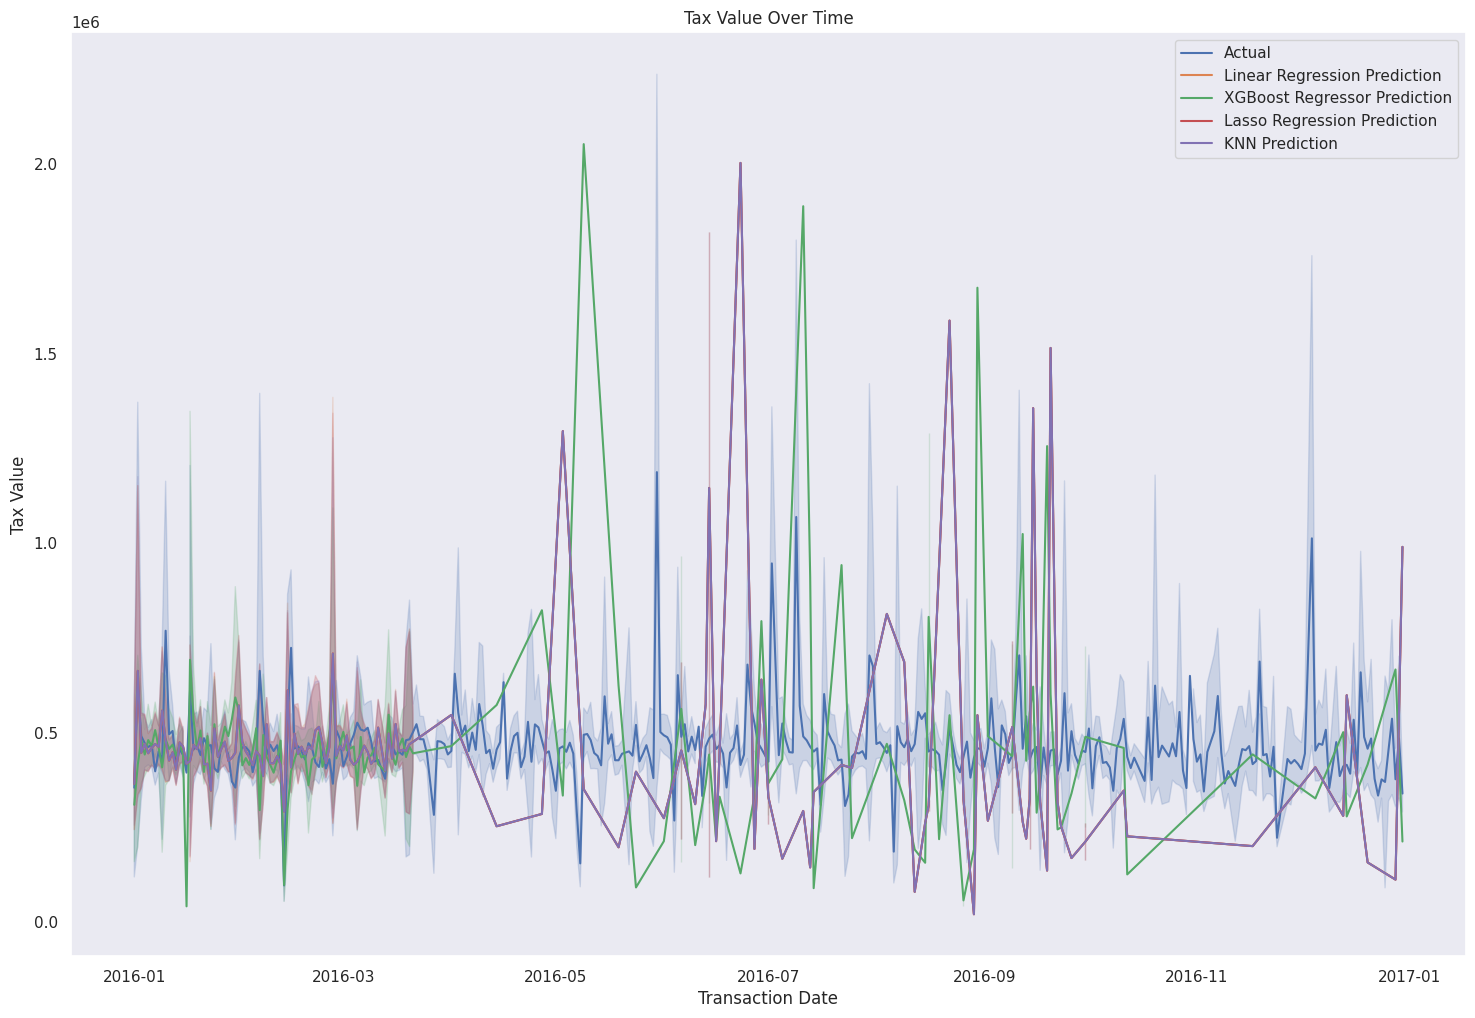

In [58]:
xg_ts = pd.DataFrame()
xg_ts['pred_xgr'] = y_test_pred_xgr
xg_ts= ridge_ts.merge(xg_ts[['pred_xgr']], how = 'left', left_index = True, right_index = True)
# print(lm_ts[['transactiondate','taxvaluedollarcnt','pred_lm']])


# Assuming you have merged the data into a DataFrame named 'merged_data'
# If not, merge the data based on the 'transactiondate' column

# Convert 'transactiondate' to datetime format
merged_data = xg_ts
merged_data['transactiondate'] = pd.to_datetime(merged_data['transactiondate'])

# Sort the data by date
merged_data = merged_data.sort_values(by='transactiondate')

# Create a time series plot using Seaborn
plt.figure(figsize=(18, 12))
sns.lineplot(x='transactiondate', y='taxvaluedollarcnt', data=merged_data, label='Actual')
sns.lineplot(x='transactiondate', y='pred_lm', data=merged_data, label='Linear Regression Prediction')
sns.lineplot(x='transactiondate', y='pred_xgr', data=merged_data, label='XGBoost Regressor Prediction')
sns.lineplot(x='transactiondate', y='pred_lasso', data=merged_data, label='Lasso Regression Prediction')
sns.lineplot(x='transactiondate', y='pred_knn', data=merged_data, label='KNN Prediction')


plt.title('Tax Value Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Tax Value')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
palette = sns.color_palette('coolwarm', as_cmap=True)

# Visualizing the differences between actual prices and predicted values
plt.figure(figsize=(10, 6))  # Adjusted figure size to match the original
plt.scatter(y_test, y_test_pred, alpha=0.7, cmap=palette, edgecolors='k', s=50)  # Added edgecolors and marker size
plt.xlabel("Actual Prices", fontsize=12)
plt.ylabel("Predicted Prices", fontsize=12)
plt.title("Prices vs Predicted Prices", fontsize=14)
plt.colorbar(label="Predicted Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='r', linewidth=2)
plt.grid(True)
plt.show()


# XG BOOST HYPERPARAMETER TUNING

In [ ]:
# print('------------XGBoost Regressor-----------------')

# # Import XGBoost Regressor
# from xgboost import XGBRegressor
# from sklearn.model_selection import GridSearchCV
# # Define the hyperparameters to iterate over
# param_grid = {
#     'max_depth': [3, 5, 7, 9],
#     'learning_rate': [0.01, 0.001, 0.0001],
#     'n_estimators': [100, 500, 1000],
#     'missing': [np.nan],
#     'objective': ['reg:squarederror'],
#     'reg_lambda': [0, 1, 10],
# }


# # create XGBoost regressor
# model = XGBRegressor(
#     tree_method='gpu_hist',
#     verbosity=0,
#     # reg_lambda=1
# )

# # perform grid search using 5-fold cross-validation
# grid_search = GridSearchCV( estimator=model, param_grid=param_grid,scoring='neg_mean_squared_error',cv=5, n_jobs=-1)
# grid_search.fit(X_train, y_train)
# # fit the model to the training data

# # get the best model and its parameters
# best_model = grid_search.best_estimator_
# best_params = grid_search.best_params_
# y_pred = best_model.predict(X_train)
# print('------------Train Set-----------------')
# # Model Evaluation
# print('R^2:',metrics.r2_score(y_train, y_pred))
# print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
# print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
# print('MSE:',metrics.mean_squared_error(y_train, y_pred))
# # print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

# # make predictions on the test data
# y_pred_xgt = best_model.predict(X_test)

# # evaluate the model on the test data
# acc_xgb = metrics.r2_score(y_test, y_pred_xgt)
# mae_xgb = metrics.mean_absolute_error(y_test, y_pred_xgt)
# rmse_xgb = np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgt))
# rmse_xgb2 = (rmse_xgb / (sum(y_test) / len(y_test)))

# # print the results
# print('------------Test Set-----------------')
# print('R^2:', acc_xgb)
# print('Adjusted R^2:', 1 - (1 - metrics.r2_score(y_test, y_pred_xgt)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))
# print('MAE:', mae_xgb)
# print('MSE:', metrics.mean_squared_error(y_test, y_pred_xgt))
# print('RMSE:', rmse_xgb)
# print('RMSE (XG Boost): {:.2f}'.format(rmse_xgb2))
# print("Best Hyperparameters:", best_params)

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Set style
# palette = sns.color_palette('coolwarm', as_cmap=True)

# # Visualizing the differences between actual prices and predicted values
# plt.figure(figsize=(10, 6))  # Adjusted figure size to match the original
# plt.scatter(y_test, y_pred_xgt, alpha=0.7, cmap=palette, edgecolors='k', s=50)  # Added edgecolors and marker size
# plt.xlabel("Actual Prices", fontsize=12)
# plt.ylabel("Predicted Prices", fontsize=12)
# plt.title("Prices vs Predicted Prices", fontsize=14)
# plt.colorbar(label="Predicted Prices")
# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='r', linewidth=2)
# plt.grid(True)
# plt.show()


In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Set style
# palette = sns.color_palette('coolwarm', as_cmap=True)

# # Visualizing the differences between actual prices and predicted values
# plt.figure(figsize=(10, 6))  # Adjusted figure size to match the original
# plt.scatter(y_test, y_test_pred, alpha=0.7, cmap=palette, edgecolors='k', s=50)  # Added edgecolors and marker size
# plt.xlabel("Actual Prices", fontsize=12)
# plt.ylabel("Predicted Prices", fontsize=12)
# plt.title("Prices vs Predicted Prices", fontsize=14)
# plt.colorbar(label="Predicted Prices")
# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='r', linewidth=2)
# plt.grid(True)
# plt.show()


# RANDOM FORREST

In [61]:
print('------------Random Forest Regressor-----------------')

# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg_rf = RandomForestRegressor(random_state=4)

# Train the model using the training sets
reg_rf.fit(X_train, y_train)

# Model prediction on train data
y_pred_rf_train = reg_rf.predict(X_train)
print('------------Train Set-----------------')
# Model Evaluation for training set
print('R^2:', metrics.r2_score(y_train, y_pred_rf_train))
print('Adjusted R^2:', 1 - (1 - metrics.r2_score(y_train, y_pred_rf_train)) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1))
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_rf_train))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_rf_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_rf_train)))

# Predicting Test data with the model
y_pred_rf_test = reg_rf.predict(X_test)
print('------------Test Set-----------------')
# Model Evaluation for test set
acc_rf = metrics.r2_score(y_test, y_pred_rf_test)
mae_rf = metrics.mean_absolute_error(y_test, y_pred_rf_test)
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf_test))
rmse_rf2 =  (rmse_rf / (sum(y_pred_rf_test) / len(y_pred_rf_test)))
print('R^2:', acc_rf)
print('Adjusted R^2:', 1 - (1 - metrics.r2_score(y_test, y_pred_rf_test)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))
print('MAE:', mae_rf)
print('MSE:', metrics.mean_squared_error(y_test, y_pred_rf_test))
print('RMSE:', rmse_rf)
print('RMSE:', rmse_rf2)

# Model prediction on the validation set
y_pred_rf_val = reg_rf.predict(X_val)
print('------------Validation Set-----------------')
# Model Evaluation for validation set
acc_rf_val = metrics.r2_score(y_val, y_pred_rf_val)
mae_rf_val = metrics.mean_absolute_error(y_val, y_pred_rf_val)
rmse_rf_val = np.sqrt(metrics.mean_squared_error(y_val, y_pred_rf_val))
rmse_rf_val2 =  (rmse_rf_val / (sum(y_pred_rf_val) / len(y_pred_rf_val)))
print('R^2:', acc_rf_val)
print('Adjusted R^2:', 1 - (1 - metrics.r2_score(y_val, y_pred_rf_val)) * (len(y_val) - 1) / (len(y_val) - X_val.shape[1] - 1))
print('MAE:', mae_rf_val)
print('MSE:', metrics.mean_squared_error(y_val, y_pred_rf_val))
print('RMSE:', rmse_rf_val)
print('RMSE:', rmse_rf_val2)


------------Random Forest Regressor-----------------
------------Train Set-----------------
R^2: 0.9919343728207348
Adjusted R^2: 0.9919322875246959
MAE: 18140.511701283114
MSE: 2584707166.0448966
RMSE: 50840.01540169807
------------Test Set-----------------
R^2: 0.9159285925711886
Adjusted R^2: 0.9158633486851574
MAE: 49739.39088396566
MSE: 25989171978.690437
RMSE: 161211.5752006984
RMSE: 0.35307093650733057
------------Validation Set-----------------
R^2: 0.8798072486797622
Adjusted R^2: 0.8797139727086711
MAE: 49904.60091262014
MSE: 32321746478.642033
RMSE: 179782.49769830776
RMSE: 0.3969213154380371


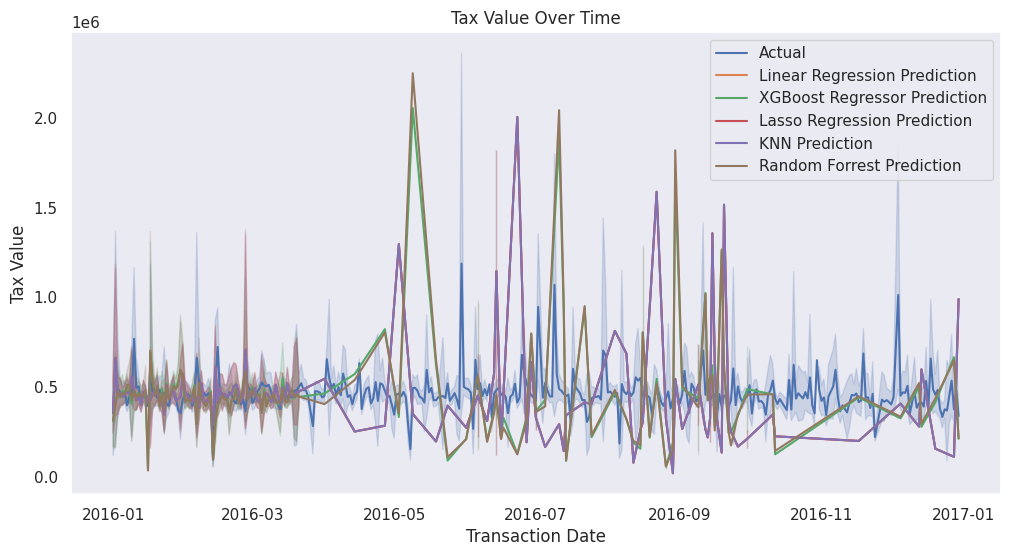

In [71]:
rf_ts = pd.DataFrame()
rf_ts['pred_rf'] = y_pred_rf_test
rf_ts= xg_ts.merge(rf_ts[['pred_rf']], how = 'left', left_index = True, right_index = True)
# print(lm_ts[['transactiondate','taxvaluedollarcnt','pred_lm']])

# Assuming you have merged the data into a DataFrame named 'merged_data'
# If not, merge the data based on the 'transactiondate' column

# Convert 'transactiondate' to datetime format
merged_data = rf_ts
merged_data['transactiondate'] = pd.to_datetime(merged_data['transactiondate'])

# Sort the data by date
merged_data = merged_data.sort_values(by='transactiondate')

# Create a time series plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='transactiondate', y='taxvaluedollarcnt', data=merged_data, label='Actual')
sns.lineplot(x='transactiondate', y='pred_lm', data=merged_data, label='Linear Regression Prediction')
sns.lineplot(x='transactiondate', y='pred_xgr', data=merged_data, label='XGBoost Regressor Prediction')
sns.lineplot(x='transactiondate', y='pred_lasso', data=merged_data, label='Lasso Regression Prediction')
sns.lineplot(x='transactiondate', y='pred_knn', data=merged_data, label='KNN Prediction')
sns.lineplot(x='transactiondate', y='pred_rf', data=merged_data, label='Random Forrest Prediction')
# Add more lines for other models if needed

plt.title('Tax Value Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Tax Value')
plt.legend()
plt.grid()
plt.show()


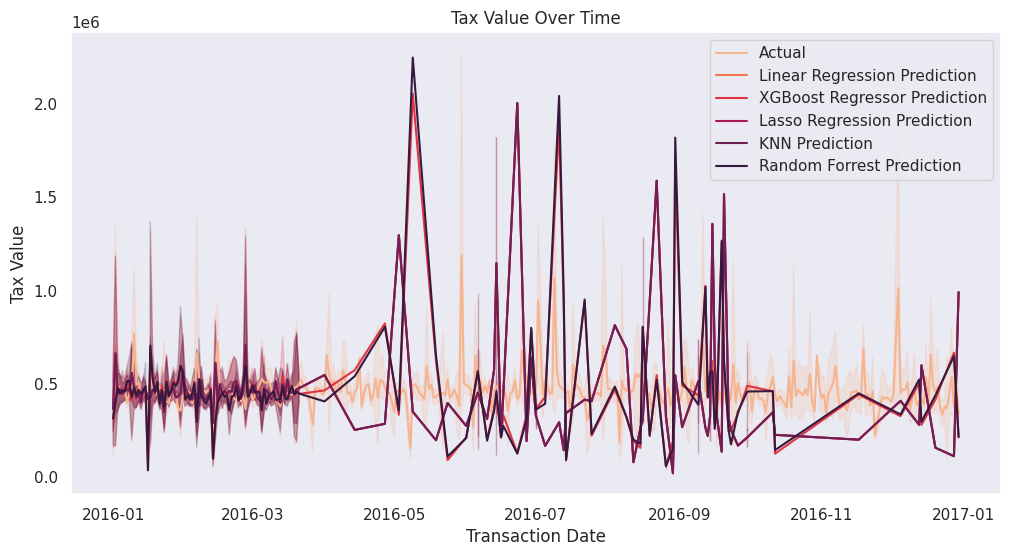

In [87]:
rf_ts = pd.DataFrame()
rf_ts['pred_rf'] = y_pred_rf_test
rf_ts = xg_ts.merge(rf_ts[['pred_rf']], how='left', left_index=True, right_index=True)
# sns.cubehelix_palette(dark=.25, light=.75)

sns.set_palette("rocket_r")

# Assuming you have merged the data into a DataFrame named 'merged_data'
# If not, merge the data based on the 'transactiondate' column

# Convert 'transactiondate' to datetime format
merged_data = rf_ts
merged_data['transactiondate'] = pd.to_datetime(merged_data['transactiondate'])

# Sort the data by date
merged_data = merged_data.sort_values(by='transactiondate')

# Create a time series plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='transactiondate', y='taxvaluedollarcnt', data=merged_data, label='Actual')
sns.lineplot(x='transactiondate', y='pred_lm', data=merged_data, label='Linear Regression Prediction')
sns.lineplot(x='transactiondate', y='pred_xgr', data=merged_data, label='XGBoost Regressor Prediction')
sns.lineplot(x='transactiondate', y='pred_lasso', data=merged_data, label='Lasso Regression Prediction')
sns.lineplot(x='transactiondate', y='pred_knn', data=merged_data, label='KNN Prediction')
sns.lineplot(x='transactiondate', y='pred_rf', data=merged_data, label='Random Forrest Prediction')
# Add more lines for other models if needed

plt.title('Tax Value Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Tax Value')
plt.legend()
plt.grid()
plt.show()


# RANDOM FOREST HYPERPARAMTER TUNING

In [ ]:
# # Import Random Forest Regressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV
# from sklearn import metrics
# import numpy as np

# print('------------Random Forest Regressor-----------------')

# # Define the hyperparameters to iterate over
# param_grid = {
#     'n_estimators': [50, 80, 100,500],
#     'max_depth': [3, 5, 7,12],
#     'min_samples_leaf': [1, 2, 4,6,8,12],
#     'bootstrap': [True, False]
# }

# # Create a Random Forest Regressor
# reg_rf = RandomForestRegressor(random_state=4)

# # Create a grid search object
# grid_search = GridSearchCV(estimator=reg_rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# grid_search.fit(X_train, y_train)

# # # Train the model using the grid search object
# # grid_search.fit(X_train, y_train)

# # Get the best hyperparameters and model
# best_params = grid_search.best_params_
# best_rf_model = grid_search.best_estimator_

# # Model prediction on train data using the best model
# y_pred_rf_train = best_rf_model.predict(X_train)
# print('------------Train Set-----------------')
# # Model Evaluation for training set
# print('R^2:', metrics.r2_score(y_train, y_pred_rf_train))
# print('Adjusted R^2:', 1 - (1 - metrics.r2_score(y_train, y_pred_rf_train)) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1))
# print('MAE:', metrics.mean_absolute_error(y_train, y_pred_rf_train))
# print('MSE:', metrics.mean_squared_error(y_train, y_pred_rf_train))
# print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_rf_train)))

# # Predicting Test data with the best model
# y_pred_rf_test_tuned = best_rf_model.predict(X_test)
# print('------------Test Set-----------------')
# # Model Evaluation for  l.;/'
# acc_rf = metrics.r2_score(y_test, y_pred_rf_test)
# mae_rf = metrics.mean_absolute_error(y_test, y_pred_rf_test)
# rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf_test))
# rmse_rf2 = (rmse_rf / (sum(y_pred_rf_test) / len(y_pred_rf_test)))
# print('R^2:', acc_rf)
# print('Adjusted R^2:', 1 - (1 - metrics.r2_score(y_test, y_pred_rf_test)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))
# print('MAE:', mae_rf)
# print('MSE:', metrics.mean_squared_error(y_test, y_pred_rf_test))
# print('RMSE:', rmse_rf)
# print('RMSE (Normalized):', rmse_rf2)

# # Print the best hyperparameters and the corresponding evaluation metrics
# print("Best Hyperparameters:", best_params)

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Set style
# palette = sns.color_palette('coolwarm', as_cmap=True)

# # Visualizing the differences between actual prices and predicted values
# plt.figure(figsize=(10, 6))  # Adjusted figure size to match the original
# plt.scatter(y_test, y_pred_rf_test_tuned, alpha=0.7, cmap=palette, edgecolors='k', s=50)  # Added edgecolors and marker size
# plt.xlabel("Actual Prices", fontsize=12)
# plt.ylabel("Predicted Prices", fontsize=12)
# plt.title("Prices vs Predicted Prices", fontsize=14)
# plt.colorbar(label="Predicted Prices")
# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='r', linewidth=2)
# plt.grid(True)
# plt.show()

# FINAL RESULTS

In [ ]:
import matplotlib.pyplot as plt

# Define the data
models = ['Linear Regression', 'XGBoost', 'XGBoost Tuned', 'Random Forest', 'Random Forest Tuned',]
train_r2 = [0.8745, 0.9961, 0.9076, 0.9819, 0.8781]
test_r2 = [0.8779, 0.8909, 0.8815, 0.8781, 0.9076]

train_adj_r2 = [0.8714, 0.9960, 0.9022, 0.9815, 0.8709]
test_adj_r2 = [0.8707, 0.8845, 0.8745, 0.8709, 0.9022]

train_mae = [17881.59, 3441.62, 17286.30, 6379.03, 8451.51]
test_mae = [19640.67, 17859.04, 18156.36, 18077.84, 17286.30]

train_mse = [761516090.09, 23667685.30, 658056407.67, 109684477.50, 188227471.07]
test_mse = [869390299.60, 776970472.90, 843827515.26, 868572708.18, 658056407.67]

test_rmse_normalized = [0.16, 0.15, 0.14, 0.1606, 0.1628]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create the table
cell_text = [ test_rmse_normalized,test_r2, test_adj_r2, test_mae,  test_mse]
rows = [ "Test RMSE",'Test R^2','Test Adj R^2',  'Test MAE', 'Test MSE']
cell_text = list(map(list, zip(*cell_text)))  # Transpose cell_text for the table

table = ax.table(cellText=cell_text, rowLabels=models, colLabels=rows, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(2, 2)

# Hide axis
ax.axis('off')

# Show the table
plt.title('Model Metrics Comparison (Train vs. Test)')
plt.show()
